# TP 1

In [1]:
import random
from math import exp, sqrt, ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

## Exercice 1

Simuler un marché selon les informations données. Et tracer le graphique.

T = 5 ans
Vol = 20%
Taux sans risque = 4%

In [2]:
T = 5 * 365
vol = 0.2
r = 0.04

In [3]:
def get_s(s0: float, vol: float, rate: float):
    return s0 * exp((rate - (vol**2)/2) * (1/365) + vol * sqrt(1/365) * np.random.normal(loc = 0.0, scale = 1.0, size = None))

In [4]:
s0 = 1
s = [0] * (T + 1)
s[0] = s0
for i in range(0, T):
    s[i + 1] =  get_s(s[i], vol, r)

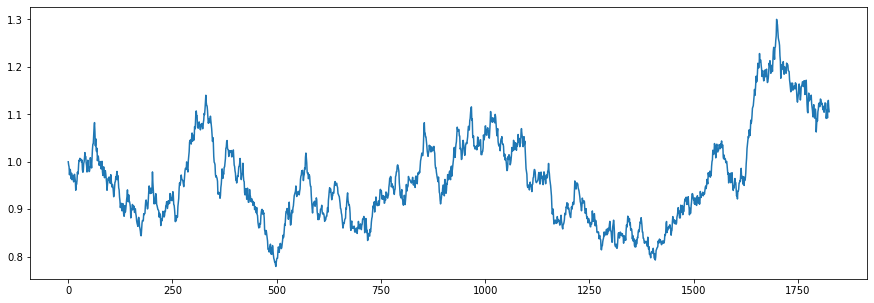

In [5]:
plt.plot(range(0,T + 1), s)

## Exercice 2

Simuler la perfomance du fond avec la méthode du coussin.

multiplicateur = 1

In [6]:
# Entrée
multiplicateur = 3
garantie = 100/100

# Création des variables
nav = [0] * (T + 1)
ar = [0] * (T + 1)
bondfloor = [0] * (T + 1)
coussin = [0] * (T + 1)
expo = [0] * (T + 1)
nav_rendement = [0] * (T + 1)
s_rendement = [0] * (T + 1)

# Initialisation : t = 0
nav[0] = 1
bondfloor[0] = garantie * exp(-r*T/365)
coussin[0] = nav[0] - bondfloor[0]
ar[0] = multiplicateur * coussin[0]
expo[0] = ar[0] / nav[0]

In [7]:
# Calcul des variables

for i in range(0, T):
    nav[i + 1] = ar[i] * s[i + 1]/s[i] + (nav[i] - ar[i]) * (1 + r * 1/365)
    bondfloor[i + 1] = garantie * exp(-r*(T-i)/365)
    coussin[i + 1] = nav[i + 1] - bondfloor[i + 1]
    ar[i + 1] = multiplicateur * coussin[i + 1]
    expo[i + 1] = ar[i + 1] / nav[i + 1]
    nav_rendement[i + 1] = nav[i + 1] / nav[i] - 1
    s_rendement[i + 1] = s[i + 1] / s[i] - 1

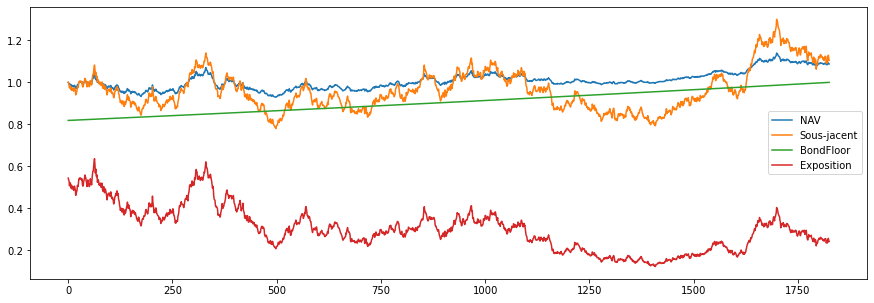

In [8]:
plt.plot(range(0, T + 1), nav, label = "NAV")
plt.plot(range(0,T + 1), s, label = "Sous-jacent")
plt.plot(range(0, T + 1), bondfloor, label = "BondFloor")
plt.plot(range(0, T + 1), expo, label = "Exposition")
plt.legend()
plt.show()

## Exercice 3

Calculs des rendements annualisés pour le fond et l'indice. Ainsi que de la volatilité annualisée.

In [9]:
# Rendements :

# Fond
rendement_F = {
    "5Y": (nav[T]/nav[0])**(365/(T)) - 1,
    "3Y": (nav[T]/nav[2 * 365])**(365/(T - 2*365)) - 1,
    "1Y": (nav[T]/nav[4 * 365])**(365/(T - 4*365)) - 1,
    "6M": (nav[T]/nav[6 * 30 + 4 * 365])**(365/(T - (6 * 30 + 4 * 365))) - 1,
    "3M": (nav[T]/nav[9 * 30 + 4 * 365])**(365/(T - (9 * 30 + 4 * 365))) - 1,
}

print("Rendement du fond : ", end="")
print(rendement_F)

# Indice
rendement_I = {
    "5Y": (s[T]/s[0])**(365/(T)) - 1,
    "3Y": (s[T]/s[2 * 365])**(365/(T - 2*365)) - 1,
    "1Y": (s[T]/s[4 * 365])**(365/(T - 4*365)) - 1,
    "6M": (s[T]/s[6 * 30 + 4 * 365])**(365/(T - (6 * 30 + 4 * 365))) - 1,
    "3M": (s[T]/s[9 * 30 + 4 * 365])**(365/(T - (9 * 30 + 4 * 365))) - 1,
}

print("Rendement de l'indice : ", end="")
print(rendement_I)

Rendement du fond : {'5Y': 0.016942569209334124, '3Y': 0.03816351744088253, '1Y': 0.07050873932393431, '6M': 0.023002901437983114, '3M': -0.043313390057786005}
Rendement de l'indice : {'5Y': 0.02027069715396479, '3Y': 0.07327041920748889, '1Y': 0.25063445339516877, '6M': 0.014948500742472115, '3M': -0.20275828331729673}


In [10]:
# Volatilités :

# Fond
r_barre = np.mean(nav_rendement)
vol_port = (1 / (T - 1)) * sum([(r - r_barre)**2 for r in nav_rendement])
vol_port_ann = vol_port * sqrt(365)
print("Volatilité annualisé du fond : " + str(round(vol_port_ann, 4)))

# Indice
s_barre = np.mean(s_rendement)
vol_indice = (1 / (T - 1)) * sum([(ss - s_barre)**2 for ss in s_rendement])
vol_indice_ann = vol_indice * sqrt(365)
print("Volatilité annualisé de l'indice : " + str(round(vol_indice_ann, 4)))


Volatilité annualisé du fond : 0.0002
Volatilité annualisé de l'indice : 0.0022
